**Imorting Necessary Libraries**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Loading the dataset
file_path = "usecase_4_.csv"
df = pd.read_csv(file_path)




**Data Preprocessing**


In [ ]:
# Convert 'Start Date' and 'Completion Date' to datetime objects
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y')
df['Completion Date'] = pd.to_datetime(df['Completion Date'], format='%m/%d/%Y')

#Calculating the time duration for better analysis
df['Time Duration'] = (df['Completion Date'] - df['Start Date']).dt.days

In [ ]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Recruitment Rate,Time Duration
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,https://clinicaltrials.gov/study/NCT00900809,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,...,QUILT-3.018,2014-05-12,6/2/2015,2015-06-02,5/13/2009,NaN,4/5/2022,"UPMC Cancer Center - Hillman Cancer Center, Pi...",0.55,386.0
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,https://clinicaltrials.gov/study/NCT01113515,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",...,Novalead-Galnobax-0210,2014-02-20,6/27/2015,2015-10-17,4/30/2010,5/20/2024,5/20/2024,"VA New England Health Care Division, Providenc...",0.44,604.0
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,https://clinicaltrials.gov/study/NCT01288573,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,...,DFI12860|2010-019340-40|MOZ15609,2014-03-03,5/9/2017,2017-05-09,2/2/2011,NaN,5/16/2017,"Investigational Site Number 51, Gent, 9000, Be...",0.04,1163.0
3,NCT01336660,A Trial of Equine F (ab')2 Antivenom for Treat...,https://clinicaltrials.gov/study/NCT01336660,COMPLETED,This study has the objective to demonstrate th...,NO,Poisoning by Scorpion Sting,BIOLOGICAL: Equine F(ab')2 antivenom|OTHER: In...,To demonstrate the effectiveness of Alacramyn ...,Effectiveness of Alacramyn NAMO in the treatme...,...,XM-10/02,2018-07-21,11/1/2018,2018-11-15,4/18/2011,NaN,12/13/2018,"CHU Hassan II de FÃ¨s, FÃ¨s, Morocco|HÃ´pital ...",7.28,117.0
4,NCT01376167,Ph 2B/3 Tafenoquine (TFQ) Study in Prevention ...,https://clinicaltrials.gov/study/NCT01376167,COMPLETED,The purpose of this two part study is to test ...,YES,"Malaria, Vivax",DRUG: Chloroquine 600mg|DRUG: Chloroquine 300m...,Number of Participants With Recurrence-free Ef...,Number of Participants With Recurrence-free Ef...,...,112582|TAF112582,2014-04-24,11/18/2016,2016-11-18,6/20/2011,4/23/2018,4/23/2018,"GSK Investigational Site, Bandarban, Banglades...",1.97,939.0


In [ ]:
df.shape

(20676, 30)

In [ ]:
#calculating time duration in months
df['Time Duration (Months)'] = (df['Time Duration'] / 30.44).round(2) # Approximate days in a month

In [ ]:
# Droping specified columns
columns_to_drop = ['Start Date', 'Completion Date', 'Primary Completion Date', 'First Posted', 'Last Update Posted']
df = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' handles cases where columns might not exist

df.head()


,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Enrollment,Funder Type,Study Type,Study Design,Other IDs,Results First Posted,Locations,Study Recruitment Rate,Time Duration,Time Duration (Months)
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,https://clinicaltrials.gov/study/NCT00900809,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,...,7,INDUSTRY,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,QUILT-3.018,NaN,"UPMC Cancer Center - Hillman Cancer Center, Pi...",0.55,386.0,12.68
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,https://clinicaltrials.gov/study/NCT01113515,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",...,44,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,Novalead-Galnobax-0210,5/20/2024,"VA New England Health Care Division, Providenc...",0.44,604.0,19.84
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,https://clinicaltrials.gov/study/NCT01288573,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,...,46,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,DFI12860|2010-019340-40|MOZ15609,NaN,"Investigational Site Number 51, Gent, 9000, Be...",0.04,1163.0,38.21
3,NCT01336660,A Trial of Equine F (ab')2 Antivenom for Treat...,https://clinicaltrials.gov/study/NCT01336660,COMPLETED,This study has the objective to demonstrate th...,NO,Poisoning by Scorpion Sting,BIOLOGICAL: Equine F(ab')2 antivenom|OTHER: In...,To demonstrate the effectiveness of Alacramyn ...,Effectiveness of Alacramyn NAMO in the treatme...,...,56,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,XM-10/02,NaN,"CHU Hassan II de FÃ¨s, FÃ¨s, Morocco|HÃ´pital ...",7.28,117.0,3.84
4,NCT01376167,Ph 2B/3 Tafenoquine (TFQ) Study in Prevention ...,https://clinicaltrials.gov/study/NCT01376167,COMPLETED,The purpose of this two part study is to test ...,YES,"Malaria, Vivax",DRUG: Chloroquine 600mg|DRUG: Chloroquine 300m...,Number of Participants With Recurrence-free Ef...,Number of Participants With Recurrence-free Ef...,...,851,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,112582|TAF112582,4/23/2018,"GSK Investigational Site, Bandarban, Banglades...",1.97,939.0,30.85


In [ ]:
#Coverting features to numeric form to train ml models
print("Initial data types:")
print(df.dtypes)

# Convert 'Enrollment' to numeric
if 'Enrollment' in df.columns:
    df['Enrollment'] = pd.to_numeric(df['Enrollment'], errors='coerce')

# Convert 'Study Recruitment Rate' to numeric
if 'Study Recruitment Rate' in df.columns:
    df['Study Recruitment Rate'] = pd.to_numeric(df['Study Recruitment Rate'], errors='coerce')

# Handle missing values in numeric columns
df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)
df['Study Recruitment Rate'].dropna(inplace=True)

# Identify object-type columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\nObject-type features before encoding:")
print(object_columns)

# Encode categorical variables
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Verify updated data types
print("\nData types after encoding:")
print(df.dtypes)

Initial data types:
NCT Number                     object
Study Title                    object
Study URL                      object
Study Status                   object
Brief Summary                  object
Study Results                  object
Conditions                     object
Interventions                  object
Primary Outcome Measures       object
Secondary Outcome Measures     object
Other Outcome Measures         object
Sponsor                        object
Collaborators                  object
Sex                            object
Age                            object
Phases                         object
Enrollment                      int64
Funder Type                    object
Study Type                     object
Study Design                   object
Other IDs                      object
Results First Posted           object
Locations                      object
Study Recruitment Rate         object
Time Duration                 float64
Time Duration (Months)        

<ipython-input-8-88bb86adc06b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)



Data types after encoding:
NCT Number                      int64
Study Title                     int64
Study URL                       int64
Study Status                    int64
Brief Summary                   int64
Study Results                   int64
Conditions                      int64
Interventions                   int64
Primary Outcome Measures        int64
Secondary Outcome Measures      int64
Other Outcome Measures          int64
Sponsor                         int64
Collaborators                   int64
Sex                             int64
Age                             int64
Phases                          int64
Enrollment                      int64
Funder Type                     int64
Study Type                      int64
Study Design                    int64
Other IDs                       int64
Results First Posted            int64
Locations                       int64
Study Recruitment Rate        float64
Time Duration                 float64
Time Duration (Months)

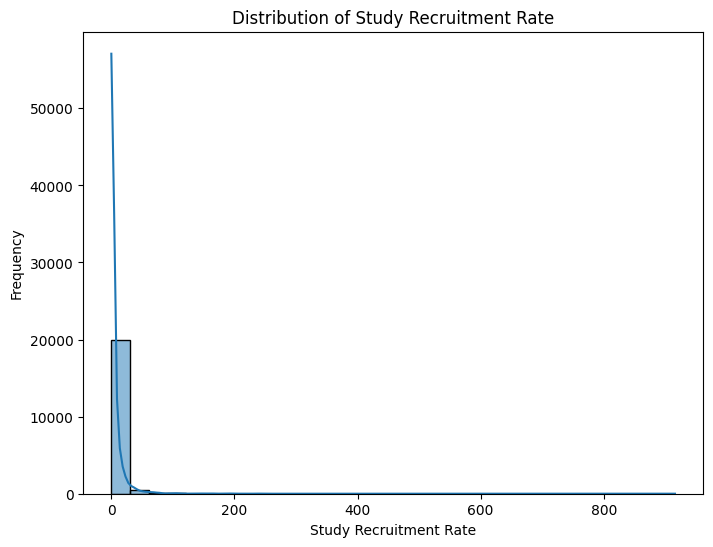

In [ ]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Study Recruitment Rate'], kde=True, bins=30)
plt.title("Distribution of Study Recruitment Rate")
plt.xlabel("Study Recruitment Rate")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Removing the column 'Study Type' from the dataset
if 'Study Type' in df.columns:
    df.drop(columns=['Study Type'], inplace=True)
    print("'Study Type' column has been removed.")
else:
    print("'Study Type' column does not exist in the dataset.")

'Study Type' column has been removed.


In [ ]:
test1=df.copy()

# Drop specified columns if they exist in the dataset
columns_to_drop = ['Other Outcome Measures', 'Collaborators']

# Check and drop columns
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

In [ ]:
#Checking empty records
df.isnull().sum()

,0
NCT Number,0
Study Title,0
Study URL,0
Study Status,0
Brief Summary,0
Study Results,0
Conditions,0
Interventions,0
Primary Outcome Measures,0
Sponsor,0


In [ ]:
# Remove rows where 'Study Recruitment Rate' is missing
if 'Study Recruitment Rate' in df.columns:
    initial_count = len(df)
    df = df.dropna(subset=['Study Recruitment Rate'])
    final_count = len(df)
    print(f"Removed {initial_count - final_count} rows with missing values in 'Study Recruitment Rate'.")
else:
    print("'Study Recruitment Rate' column does not exist in the dataset.")

Removed 7 rows with missing values in 'Study Recruitment Rate'.


In [ ]:
# Drop specified columns, but keep 'Time Duration (Months)'
columns_to_drop = ['Time Duration', 'Time Duration Months'] # Note the corrected column name
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

In [ ]:
# Drop specified columns, including 'Secondary Outcome Measures'
columns_to_drop = ['Other Outcome Measures', 'Collaborators', 'Secondary Outcome Measures']

# Check and drop columns
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

In [ ]:
# Removing rows where 'Time Duration (Months)' is 0 or missing.
initial_count = len(df)
df = df[(df['Time Duration (Months)'] != 0) & (~df['Time Duration (Months)'].isnull())]
final_count = len(df)
print(f"Removed {initial_count - final_count} rows with zero or missing values in 'Time Duration (Months)'.")

Removed 1 rows with zero or missing values in 'Time Duration (Months)'.


In [ ]:
# Drop specified columns
columns_to_drop = ['First Posted']

# Check and drop columns
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

In [ ]:
# Droping specified columns due to their lack of significance for result
columns_to_drop = ['NCT Number', 'Study URL']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

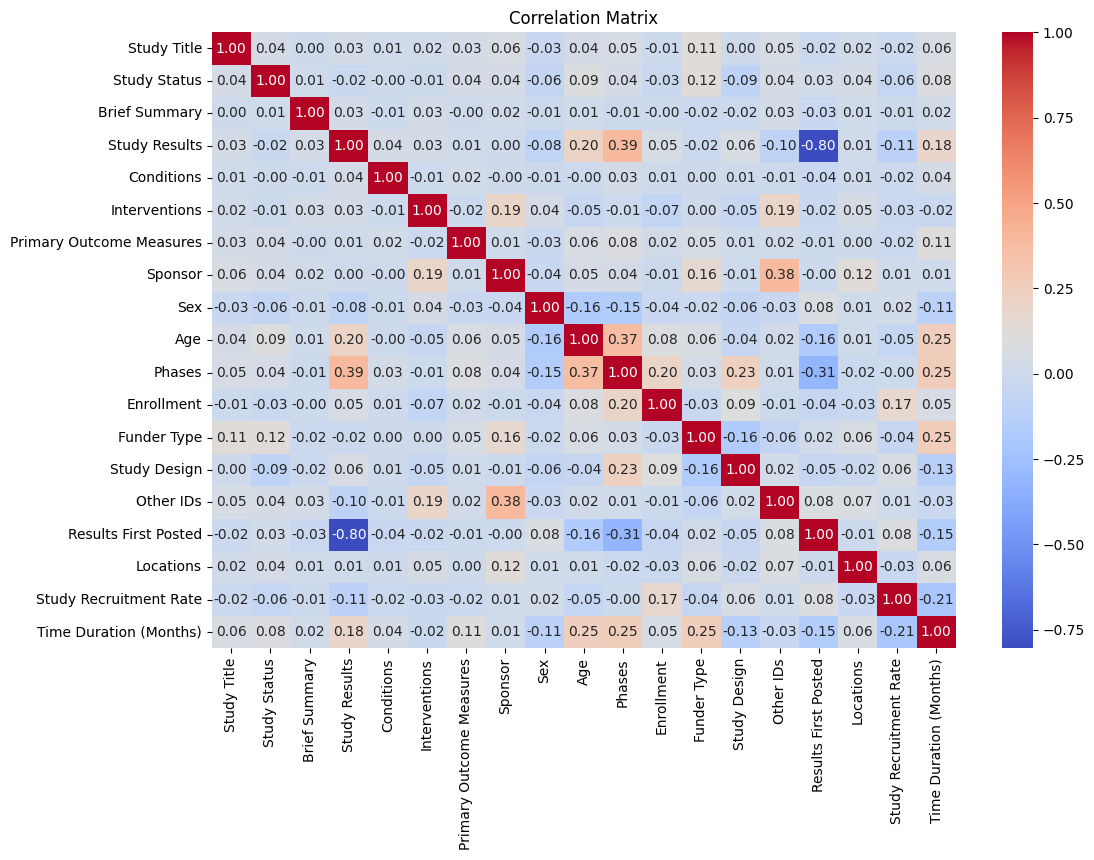

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Step 3: Feature Selection
# Identify features highly correlated with the target variable
target_corr = correlation_matrix['Study Recruitment Rate'].sort_values(ascending=False)
print("\nCorrelation of features with Study Recruitment Rate:")
print(target_corr)


Correlation of features with Study Recruitment Rate:
Study Recruitment Rate      1.000000
Enrollment                  0.166777
Results First Posted        0.083041
Study Design                0.059933
Sex                         0.023865
Sponsor                     0.010890
Other IDs                   0.009439
Phases                     -0.004238
Brief Summary              -0.012309
Study Title                -0.016781
Primary Outcome Measures   -0.017005
Conditions                 -0.018308
Interventions              -0.025354
Locations                  -0.032337
Funder Type                -0.043877
Age                        -0.051059
Study Status               -0.055765
Study Results              -0.106819
Time Duration (Months)     -0.206133
Name: Study Recruitment Rate, dtype: float64


In [ ]:
test2=df.copy()

In [ ]:
# Display the shape of the original DataFrame
print("Original DataFrame Shape:", test2.shape)

# Remove duplicate records
test2 = test2.drop_duplicates()

# Display the shape after removing duplicates
print("DataFrame Shape After Removing Duplicates:", test2.shape)

Original DataFrame Shape: (20668, 19)
DataFrame Shape After Removing Duplicates: (20668, 19)


REMOVING OUTLIERS FROM FEATURES

In [ ]:
#Removing Outliers from Features
# Step 1: Calculate Q1, Q3, and IQR for the 'Enrollment' column
Q1 = test2['Enrollment'].quantile(0.25)  # First quartile (25th percentile)
Q3 = test2['Enrollment'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers
test2 = test2[(test2['Enrollment'] >= lower_bound) & (test2['Enrollment'] <= upper_bound)]

# Display the results
print("Original DataFrame Shape:", test2.shape)
print("Filtered DataFrame Shape:", test2.shape)

Original DataFrame Shape: (17988, 19)
Filtered DataFrame Shape: (17988, 19)


In [ ]:
# Step 1: Calculate Q1, Q3, and IQR for the 'Study Recruitment Rate' column
Q1 = test2['Study Recruitment Rate'].quantile(0.25)  # First quartile (25th percentile)
Q3 = test2['Study Recruitment Rate'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers
test2_filtered = test2[(test2['Study Recruitment Rate'] >= lower_bound) & (test2['Study Recruitment Rate'] <= upper_bound)]

# Display the results
print("Original DataFrame Shape:", test2.shape)
print("Filtered DataFrame Shape:", test2_filtered.shape)

Original DataFrame Shape: (17988, 19)
Filtered DataFrame Shape: (16130, 19)


In [ ]:
# Check for null values in test2 DataFrame
print(test2.isnull().sum())

Study Title                 0
Study Status                0
Brief Summary               0
Study Results               0
Conditions                  0
Interventions               0
Primary Outcome Measures    0
Sponsor                     0
Sex                         0
Age                         0
Phases                      0
Enrollment                  0
Funder Type                 0
Study Design                0
Other IDs                   0
Results First Posted        0
Locations                   0
Study Recruitment Rate      0
Time Duration (Months)      0
dtype: int64


In [ ]:
#Removing Results First Posted column

if 'Results First Posted' in test2.columns:
    test2 = test2.drop(columns=['Results First Posted'])
    print("'Results First Posted' column removed successfully.")
else:
    print("'Results First Posted' column not found in the DataFrame.")



'Results First Posted' column removed successfully.


In [ ]:
#CREATING ANOTHER DATAFRAME FOR CLEARIFICATION
test3=test2.copy()

In [ ]:
Q1 = test3['Study Design'].quantile(0.25)
Q3 = test3['Study Design'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
test3 = test3[(test3['Study Design'] >= lower_bound) & (test3['Study Design'] <= upper_bound)]


In [ ]:
test4=test3.copy()

In [ ]:
# Splitting features and target
X = test4.drop(columns=['Study Recruitment Rate'])
y = test4['Study Recruitment Rate']

In [ ]:
#SELECTING IMPORTANT FEATURES USING RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Select top N features
top_features = feature_importances.head(10)['Feature'].tolist()
print("Top Features:", top_features)

                     Feature  Importance
16    Time Duration (Months)    0.586020
11                Enrollment    0.278623
0                Study Title    0.022068
9                        Age    0.017374
15                 Locations    0.012600
14                 Other IDs    0.012545
5              Interventions    0.012309
7                    Sponsor    0.010108
4                 Conditions    0.009212
6   Primary Outcome Measures    0.008843
13              Study Design    0.006567
2              Brief Summary    0.006491
10                    Phases    0.006411
3              Study Results    0.005384
1               Study Status    0.004186
12               Funder Type    0.000735
8                        Sex    0.000525
Top Features: ['Time Duration (Months)', 'Enrollment', 'Study Title', 'Age', 'Locations', 'Other IDs', 'Interventions', 'Sponsor', 'Conditions', 'Primary Outcome Measures']


In [ ]:
#SELECTING IMPORTANT FEATURES USING mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information
mi = mutual_info_regression(X, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Info': mi
}).sort_values(by='Mutual Info', ascending=False)

print(mi_df)

# Select top N features
top_features = mi_df.head(10)['Feature'].tolist()
print("Top Features:", top_features)

                     Feature  Mutual Info
16    Time Duration (Months)     0.547169
4                 Conditions     0.281543
15                 Locations     0.252145
9                        Age     0.192699
13              Study Design     0.192494
6   Primary Outcome Measures     0.172526
7                    Sponsor     0.129089
11                Enrollment     0.125805
0                Study Title     0.120395
14                 Other IDs     0.120316
10                    Phases     0.112112
5              Interventions     0.111109
2              Brief Summary     0.086316
1               Study Status     0.083589
3              Study Results     0.060282
12               Funder Type     0.031785
8                        Sex     0.021637
Top Features: ['Time Duration (Months)', 'Conditions', 'Locations', 'Age', 'Study Design', 'Primary Outcome Measures', 'Sponsor', 'Enrollment', 'Study Title', 'Other IDs']


In [ ]:
# Step 2: Selecting Features Based on Correlation
# Retaining features with significant correlation (> |0.05| or < -0.05 as a threshold)
selected_features = [
    'Enrollment',
    'Study Design', 'Sex', 'Sponsor', 'Study Results', 'Time Duration (Months)', 'Study Recruitment Rate',
]
test4 = test4[selected_features]

**MODEL TRAINING**

In [ ]:
# Step 3: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model Training
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For splitting data
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')
models = {}
metrics = []

# 1. LINEAR REGRESSION
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
models['Linear Regression'] = y_pred_lr


mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

metrics.append({
    'Model': 'Linear Regression',
    'MSE': mse_lr,
    'RMSE': rmse_lr,
    'MAE': mae_lr,
    'R2 Score': r2_lr
})

In [ ]:
# 2. RIDGE REGRESSION
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
models['Ridge Regression'] = y_pred_ridge

# Evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

metrics.append({
    'Model': 'Ridge Regression',
    'MSE': mse_ridge,
    'RMSE': rmse_ridge,
    'MAE': mae_ridge,
    'R2 Score': r2_ridge
})


In [ ]:
# 3. Lasso Regression
lasso = Lasso(alpha=1.0)  # Optimized hyperparameter
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
models['Lasso Regression'] = y_pred_lasso

# Evaluation metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

metrics.append({
    'Model': 'Lasso Regression',
    'MSE': mse_lasso,
    'RMSE': rmse_lasso,
    'MAE': mae_lasso,
    'R2 Score': r2_lasso
})


In [ ]:
# 4. DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, min_samples_split=2, random_state=42)  # Optimized hyperparameters
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
models['Decision Tree'] = y_pred_dt

# Evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

metrics.append({
    'Model': 'Decision Tree',
    'MSE': mse_dt,
    'RMSE': rmse_dt,
    'MAE': mae_dt,
    'R2 Score': r2_dt
})


In [ ]:
## 5. Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)  # Optimized hyperparameters
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
models['Random Forest'] = y_pred_rf

# Evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

metrics.append({
    'Model': 'Random Forest',
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'R2 Score': r2_rf
})

In [ ]:
# 6. Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.5, random_state=42)  # Optimized hyperparameters
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
models['Gradient Boosting'] = y_pred_gbr

# Evaluation metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

metrics.append({
    'Model': 'Gradient Boosting',
    'MSE': mse_gbr,
    'RMSE': rmse_gbr,
    'MAE': mae_gbr,
    'R2 Score': r2_gbr
})


In [ ]:
# 7. Support Vector Regression (SVR)
svr = SVR(C=10, kernel='rbf')  # Optimized hyperparameters
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
models['SVR'] = y_pred_svr

# Evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

metrics.append({
    'Model': 'SVR',
    'MSE': mse_svr,
    'RMSE': rmse_svr,
    'MAE': mae_svr,
    'R2 Score': r2_svr
})

In [ ]:
# 8. K-Nearest Neighbors Regression (KNN)
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')  # Optimized hyperparameters
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
models['KNN'] = y_pred_knn

# Evaluation metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

metrics.append({
    'Model': 'KNN',
    'MSE': mse_knn,
    'RMSE': rmse_knn,
    'MAE': mae_knn,
    'R2 Score': r2_knn
})

In [ ]:
results_df = pd.DataFrame(metrics)

# Round the metrics for better readability
results_df[['MSE', 'RMSE', 'MAE', 'R2 Score']] = results_df[['MSE', 'RMSE', 'MAE', 'R2 Score']].round(4)

# Display the results
print("\nModel Evaluation Results:\n", results_df)


Model Evaluation Results:
                Model       MSE      RMSE     MAE  R2 Score
0  Linear Regression  130.6323  130.6323  5.2372    0.1473
1   Ridge Regression  130.6323  130.6323  5.2372    0.1473
2   Lasso Regression  132.2408  132.2408  5.2761    0.1368
3      Decision Tree   44.1309   44.1309  1.9088    0.7119
4      Random Forest   25.0656   25.0656  1.5122    0.8364
5  Gradient Boosting   25.6338   25.6338  1.9690    0.8327
6  Gradient Boosting   25.6338   25.6338  1.9690    0.8327
7                SVR  162.9465  162.9465  4.5561   -0.0636
8                KNN  172.6609  172.6609  5.6844   -0.1270


Testing Hybrid Models

In [ ]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Define base models
base_models = [
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Step 2: Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=RandomForestRegressor(random_state=42)
)

# Step 3: Voting Regressor
voting_model = VotingRegressor(
    estimators=[
        ('random_forest', RandomForestRegressor(random_state=42)),
        ('gradient_boosting', GradientBoostingRegressor(random_state=42)),
        ('knn', KNeighborsRegressor())
    ]
)

# Step 4: Fit and Evaluate Models
models = {
    "Stacking Regressor": stacking_model,
    "Voting Regressor": voting_model
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2 Score": r2
    })

# Print Results
import pandas as pd
results_df = pd.DataFrame(results)
print("Hybrid Model Evaluation Results:")
print(results_df)


Hybrid Model Evaluation Results:
                Model        MSE      RMSE       MAE  R2 Score
0  Stacking Regressor  19.478739  4.413472  1.529247  0.872853
1    Voting Regressor  41.462113  6.439108  2.711147  0.729356


Ensembling with Stacking

In [ ]:
#STACK ENSEMBLE OF THE TOP 3 BEST MODELS
from sklearn.ensemble import VotingRegressor

# Initialize the individual models
dt = DecisionTreeRegressor(max_depth=15, min_samples_split=2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.5, random_state=42)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor(estimators=[('dt', dt), ('rf', rf), ('gbr', gbr)])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluation metrics for the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Add the ensemble model's evaluation metrics to the list
metrics.append({
    'Model': 'Ensemble (DT, RF, GB)',
    'MSE': mse_ensemble,
    'RMSE': rmse_ensemble,
    'MAE': mae_ensemble,
    'R2 Score': r2_ensemble
})
# Display the updated results
results_df = pd.DataFrame(metrics)

# Round the metrics for better readability
results_df[['MSE', 'RMSE', 'MAE', 'R2 Score']] = results_df[['MSE', 'RMSE', 'MAE', 'R2 Score']].round(4)

# Display the results
print("\nModel Evaluation Results with Ensemble:\n", results_df)


Model Evaluation Results with Ensemble:
                    Model       MSE      RMSE     MAE  R2 Score
0      Linear Regression  132.4001  132.4001  5.3452    0.1358
1       Ridge Regression  132.4000  132.4000  5.3452    0.1358
2       Lasso Regression  133.2454  133.2454  5.3644    0.1302
3          Decision Tree   40.4547   40.4547  1.8453    0.7359
4          Random Forest   22.1406   22.1406  1.6027    0.8555
5      Gradient Boosting   34.8645   34.8645  1.9509    0.7724
6                    SVR  154.3002  154.3002  4.3676   -0.0072
7                    KNN  144.2845  144.2845  4.1517    0.0582
8  Ensemble (DT, RF, GB)   23.2179   23.2179  1.6443    0.8484


Optimization Using ACO

Optimizing Linear Regression...
Best Parameters for Linear Regression: {'fit_intercept': True}
Best R2 Score: 0.13575867000024555

Optimizing Ridge Regression...
Best Parameters for Ridge Regression: {'alpha': 10.0}
Best R2 Score: 0.13577202985559833

Optimizing Lasso Regression...
Best Parameters for Lasso Regression: {'alpha': 0.1}
Best R2 Score: 0.1361441187999587

Optimizing Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best R2 Score: 0.7673572953629066

Optimizing Random Forest...
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 50}
Best R2 Score: 0.8641300952081963

Optimizing Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 100}
Best R2 Score: 0.8906521692421424

Optimizing SVR...
Best Parameters for SVR: {'C': 10, 'kernel': 'rbf'}
Best R2 Score: -0.007194286125352667

Optimizing KNN...
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Best R2 Sco

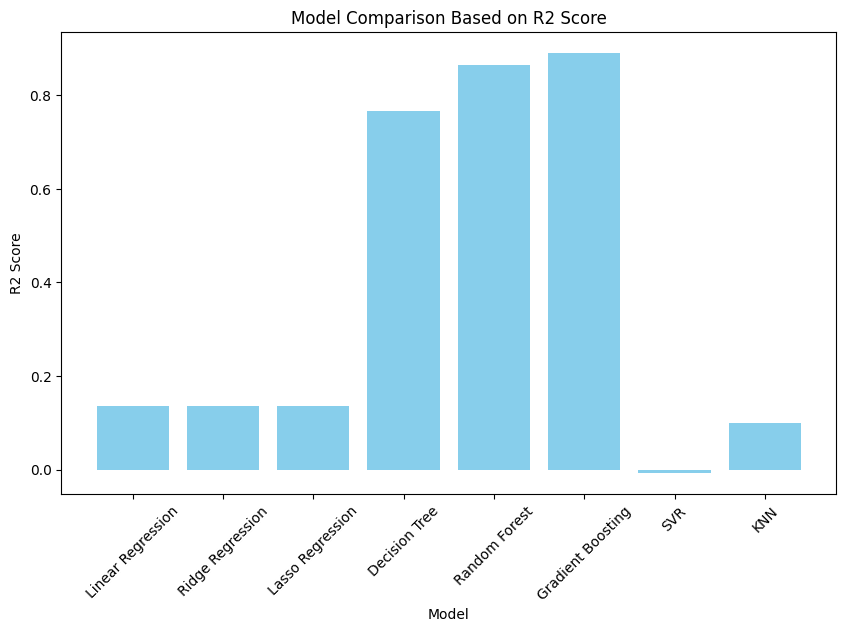

In [ ]:
#ANT COLONY OPTIMIZATION FOR HYPERPAARAMETER TUNING
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import ParameterGrid

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

param_grids = {
    'Linear Regression': {'fit_intercept': [True, False]},
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.1, 0.5, 1.0]},
    'Decision Tree': {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]},
    'Gradient Boosting': {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100]},
    'SVR': {'C': [1, 10], 'kernel': ['rbf']},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}
class ACO:
    def __init__(self, n_ants, n_iterations, alpha, beta, rho, q0):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q0 = q0

    def optimize(self, model, X_train, y_train, X_test, y_test, hyperparameter_grid):
        best_solution = None
        best_score = float('-inf')

        param_grid = list(ParameterGrid(hyperparameter_grid))

        for iteration in range(self.n_iterations):
            for ant in range(self.n_ants):
                solution = np.random.choice(param_grid)
                model.set_params(**solution)
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
                score = r2_score(y_test, predictions)

                if score > best_score:
                    best_score = score
                    best_solution = solution

        return best_solution, best_score

# Initialize ACO
aco = ACO(n_ants=10, n_iterations=10, alpha=1.0, beta=1.0, rho=0.1, q0=0.9)
results = {}
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    best_params, best_score = aco.optimize(model, X_train, y_train, X_test, y_test, param_grids[model_name])
    results[model_name] = (best_params, best_score)
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best R2 Score: {best_score}\n")

# Evaluate models
print("Model Evaluation Metrics:")
for model_name, (best_params, best_score) in results.items():
    model = models[model_name]
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"{model_name}:\n  MSE: {mse}\n  MAE: {mae}\n  R2: {r2}\n")

# Visualize results
import matplotlib.pyplot as plt

model_names = list(results.keys())
r2_scores = [results[name][1] for name in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.title("Model Comparison Based on R2 Score")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

Optimizing Hybrid Models

Optimizing Stacking Regressor...
Best Parameters for Stacking Regressor: {'final_estimator': DecisionTreeRegressor(max_depth=5), 'gb__learning_rate': 0.2, 'gb__n_estimators': 50, 'knn__n_neighbors': 5, 'rf__max_depth': None, 'rf__n_estimators': 100}
Best R2 Score: 0.8527718153352185

Stacking Regressor Evaluation Metrics:
  MSE: 22.55506727776599
  MAE: 1.6330477975277602
  R2: 0.8527718153352185


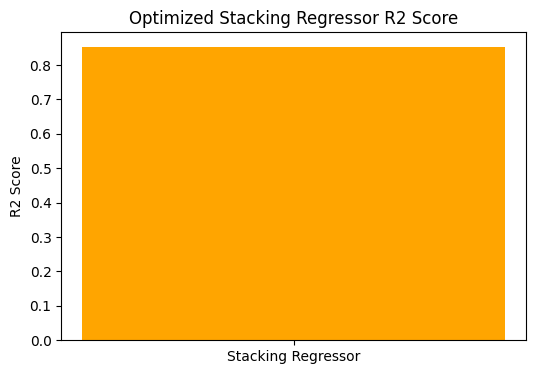

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ParameterGrid

# Base models for Stacking
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('knn', KNeighborsRegressor())
]

# Meta-model
meta_model = LinearRegression()

# Hyperparameter grid for Stacking Regressor
stacking_param_grid = {
    'final_estimator': [LinearRegression(), DecisionTreeRegressor(max_depth=5)],
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [10, 20, None],
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'knn__n_neighbors': [3, 5, 7]
}

# Initialize the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# ACO Class for Hyperparameter Tuning
class ACO:
    def __init__(self, n_ants, n_iterations, alpha, beta, rho, q0):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q0 = q0

    def optimize(self, model, X_train, y_train, X_test, y_test, hyperparameter_grid):
        best_solution = None
        best_score = float('-inf')

        param_grid = list(ParameterGrid(hyperparameter_grid))

        for iteration in range(self.n_iterations):
            for ant in range(self.n_ants):
                solution = np.random.choice(param_grid)
                model.set_params(**solution)
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
                score = r2_score(y_test, predictions)

                if score > best_score:
                    best_score = score
                    best_solution = solution

        return best_solution, best_score

# Initialize ACO for Stacking Regressor
aco = ACO(n_ants=10, n_iterations=10, alpha=1.0, beta=1.0, rho=0.1, q0=0.9)

# Perform ACO-based Hyperparameter Tuning
print("Optimizing Stacking Regressor...")
best_params, best_score = aco.optimize(
    stacking_regressor, X_train, y_train, X_test, y_test, stacking_param_grid
)
print(f"Best Parameters for Stacking Regressor: {best_params}")
print(f"Best R2 Score: {best_score}\n")

# Evaluate the optimized Stacking Regressor
stacking_regressor.set_params(**best_params)
stacking_regressor.fit(X_train, y_train)
predictions = stacking_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Stacking Regressor Evaluation Metrics:\n  MSE: {mse}\n  MAE: {mae}\n  R2: {r2}")

# Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['Stacking Regressor'], [r2], color='orange')
plt.title("Optimized Stacking Regressor R2 Score")
plt.ylabel("R2 Score")
plt.show()



Ensembling with Stacking

Stacked Ensemble Model Evaluation:
  MSE: 17.858341487334087
  MAE: 1.9332939264318667
  R2: 0.8834296893941975


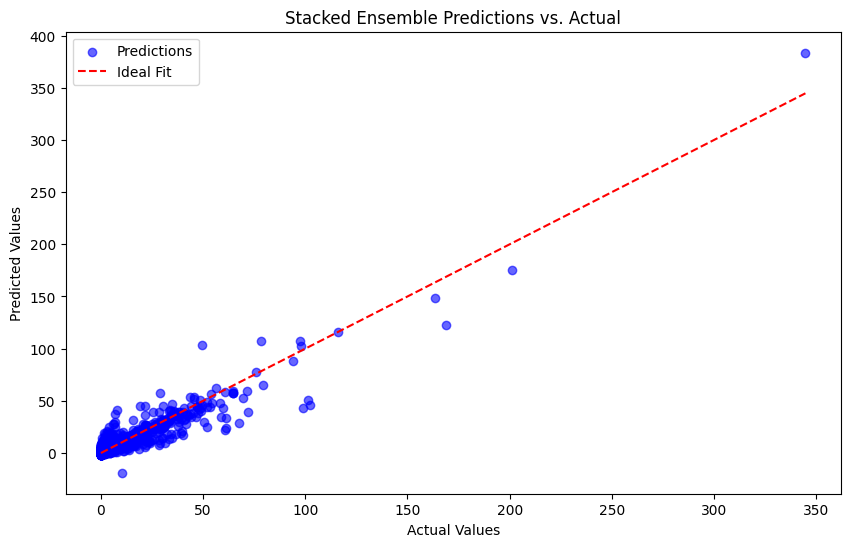

In [ ]:
#STACK ENSEMBLING OPTIMIZED ALGORITHMS
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
aco_rf_params = results['Random Forest'][0]  # Retrieve best params for Random Forest
aco_gb_params = results['Gradient Boosting'][0]  # Retrieve best params for Gradient Boosting

# Initialize models with ACO-optimized parameters
rf_model = RandomForestRegressor(random_state=42, **aco_rf_params)
gb_model = GradientBoostingRegressor(random_state=42, **aco_gb_params)

# Define the Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('Random Forest', rf_model),
        ('Gradient Boosting', gb_model)
    ],
    final_estimator=LinearRegression()  # Use a simple regressor for meta-model
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
stack_predictions = stacking_model.predict(X_test)

# Evaluate the stacked ensemble
mse = mean_squared_error(y_test, stack_predictions)
mae = mean_absolute_error(y_test, stack_predictions)
r2 = r2_score(y_test, stack_predictions)

# Print evaluation metrics
print("Stacked Ensemble Model Evaluation:")
print(f"  MSE: {mse}")
print(f"  MAE: {mae}")
print(f"  R2: {r2}")

# Visualize predictions vs. actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, stack_predictions, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Ideal Fit')
plt.title("Stacked Ensemble Predictions vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

Result Interpretation

Generating SHAP summary plot...


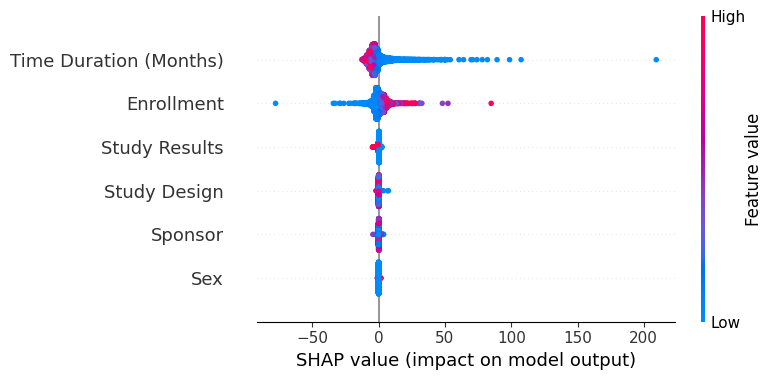

In [ ]:
# INTERPRETING OF RESULTS USING SHAP
import shap
import matplotlib.pyplot as plt

# Step 1: Select the trained Random Forest Regressor model
random_forest = models["Random Forest Regressor"]

# Step 2: Fit the Random Forest model again (if it's not already trained)
random_forest.fit(X_train, y_train)

# Step 3: Initialize SHAP explainer (no check_additivity argument for TreeExplainer)
explainer = shap.TreeExplainer(random_forest)

# Step 4: Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Step 5: Generate SHAP summary plot
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values, X_test, show=True)